In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
sns.set(style='white')

In [72]:
df = pd.read_csv("/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/mushra.csv")

In [73]:
df = df[df['trial_id'] != 'training']
df = df[df['session_uuid'] != '6078451d-adce-43a1-9289-46e0dd3514e1']

In [74]:
df['session_uuid'].value_counts()

b855b983-a931-4629-8617-a915d82251b0    39
13198be2-b8dc-451e-bca1-c1e09bcbcca2    39
90913ed2-88a6-4281-8318-b57a5d240915    39
f9840b36-a298-4e45-b879-75001199a675    39
782723df-c3a1-44a6-af8c-e03b47609747    39
a20f653e-d7fd-4f19-887b-06ad306a75ba    39
89a8207e-d6fa-423f-ad62-6d16a7b93a42    39
Name: session_uuid, dtype: int64

In [75]:
df.head()

,session_test_id,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_date,rating_comment
51,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,end2end,85,81117,"28/03/2023, 09:25:40",NaN
52,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,style_transfer,100,81117,"28/03/2023, 09:25:40",NaN
53,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,anchor,61,81117,"28/03/2023, 09:25:40",NaN
54,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,reference,100,81117,"28/03/2023, 09:25:40",NaN
55,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband1,end2end,61,41036,"28/03/2023, 09:25:40",NaN


In [78]:
df.groupby(['session_uuid', 'rating_stimulus']).mean('rating_score')

rating_score  \
session_uuid                         rating_stimulus                 
13198be2-b8dc-451e-bca1-c1e09bcbcca2 anchor              48.500000   
                                     end2end             47.916667   
                                     reference           98.916667   
                                     style_transfer      93.333333   
782723df-c3a1-44a6-af8c-e03b47609747 anchor              56.583333   
                                     end2end             73.416667   
                                     reference           76.833333   
                                     style_transfer      62.666667   
89a8207e-d6fa-423f-ad62-6d16a7b93a42 anchor              52.333333   
                                     end2end             46.750000   
                                     reference           89.833333   
                                     style_transfer      93.666667   
90913ed2-88a6-4281-8318-b57a5d240915 anchor              71.333333   
                                     end2end             76.250000   
                                     reference           93.750000   
                                     style_transfer      88.000000   
a20f653e-d7fd-4f19-887b-06ad306a75ba anchor              40.833333   
                                     end2end             29.500000   
                                     reference           89.833333   
                                     style_transfer      82.333333   
b855b983-a931-4629-8617-a915d82251b0 anchor              63.666667   
                                     end2end             59.416667   
                                     reference           98.583333   
                                     style_transfer      96.000000   
f9840b36-a298-4e45-b879-75001199a675 anchor              30.833333   
                                     end2end             28.166667   
                                     reference           95.083333   
                                     style_transfer      55.000000   

                                                       rating_time  \
session_uuid                         rating_stimulus                 
13198be2-b8dc-451e-bca1-c1e09bcbcca2 anchor           48144.166667   
                                     end2end          48144.166667   
                                     reference        48144.166667   
                                     style_transfer   46499.000000   
782723df-c3a1-44a6-af8c-e03b47609747 anchor           21398.250000   
                                     end2end          21398.250000   
                                     reference        21398.250000   
                                     style_transfer   19018.666667   
89a8207e-d6fa-423f-ad62-6d16a7b93a42 anchor           30450.000000   
                                     end2end          30450.000000   
                                     reference        30450.000000   
                                     style_transfer   37781.666667   
90913ed2-88a6-4281-8318-b57a5d240915 anchor           18225.333333   
                                     end2end          18225.333333   
                                     reference        18225.333333   
                                     style_transfer   23132.333333   
a20f653e-d7fd-4f19-887b-06ad306a75ba anchor           45739.833333   
                                     end2end          45739.833333   
                                     reference        45739.833333   
                                     style_transfer   42809.333333   
b855b983-a931-4629-8617-a915d82251b0 anchor           41300.916667   
                                     end2end          41300.916667   
                                     reference        41300.916667   
                                     style_transfer   50642.666667   
f9840b36-a298-4e45-b879-75001199a675 anchor           35570.583333   
                                     end2end          35570.583

In [84]:
avg_mins = (df.groupby(['session_uuid']).sum('rating_time')['rating_time'] / (1000 * 60))

print(f"Users took {avg_mins.mean():.2f} mins (std: {avg_mins.std():.2f} mins) to complete the MUSHRA evaluation.")

Users took 22.53 mins (std: 7.53 mins) to complete the MUSHRA evaluation.


In [60]:
def remove_anchor_reference_mix(df):
    # Group the data by 'uuid' and 'trial_id'
    df = df.reset_index()
    grouped = df.groupby(['session_uuid', 'trial_id'])

    # Create an empty list to store the indices of rows that meet the criteria
    indices = []
    num_instances = 0
    names = []

    # Iterate over each group
    for name, group in grouped:
        # Get the ratings for 'anchor' and 'reference' stimuli
        anchor_rating = group[group['rating_stimulus'] == 'anchor']['rating_score'].values
        ref_rating = group[group['rating_stimulus'] == 'reference']['rating_score'].values

        # Check if the anchor rating is higher than the reference rating
        if len(anchor_rating) > 0 and len(ref_rating) > 0 and anchor_rating[0] > ref_rating[0]:
            num_instances += 1
            # If so, add the indices of the rows to the list
            indices.extend(list(group.index))
            names.append(name)
    
    print(f"{num_instances} user, trial pairs removed!")
    return df.drop(indices)

In [61]:
df = remove_anchor_reference_mix(df)

8 user, trial pairs removed!


In [62]:
palette = sns.color_palette(n_colors=4).as_hex()
names = ['end2end', 'style_transfer', 'reference', 'anchor']
colour_map = {name: palette[i] for i, name in enumerate(names)}

format_map = {
    'end2end': 'Our model',
    'anchor': 'Anchor',
    'reference': 'Reference',
    'style_transfer': 'DeepAFx-ST'
}

In [63]:
# def boxplot_effect(df, effect_name):
#     fx = df[df['trial_id'].str.contains(effect_name.lower())]
#     order = fx.groupby(by=["rating_stimulus"])['rating_score'].median().sort_values().index
    
#     my_colours = [colour_map[fx] for fx in order]
#     sns.set_palette(my_colours)
    
#     ax = sns.boxplot(fx, x='rating_stimulus', y='rating_score', order=order)
    
#     ax.set_xlabel("Rating Stimulus")
#     ax.set_ylabel("Rating Score")
#     ax.set_ylim([0,105])
#     ax.yaxis.grid(True)
    
#     labels = [format_map[x] for x in order]
#     ax.set_xticklabels(labels, 
# #                        rotation=20, 
# #                        fontsize=12
#                       )
    
#     ax.set_title(effect_name.title())
#     plt.show()

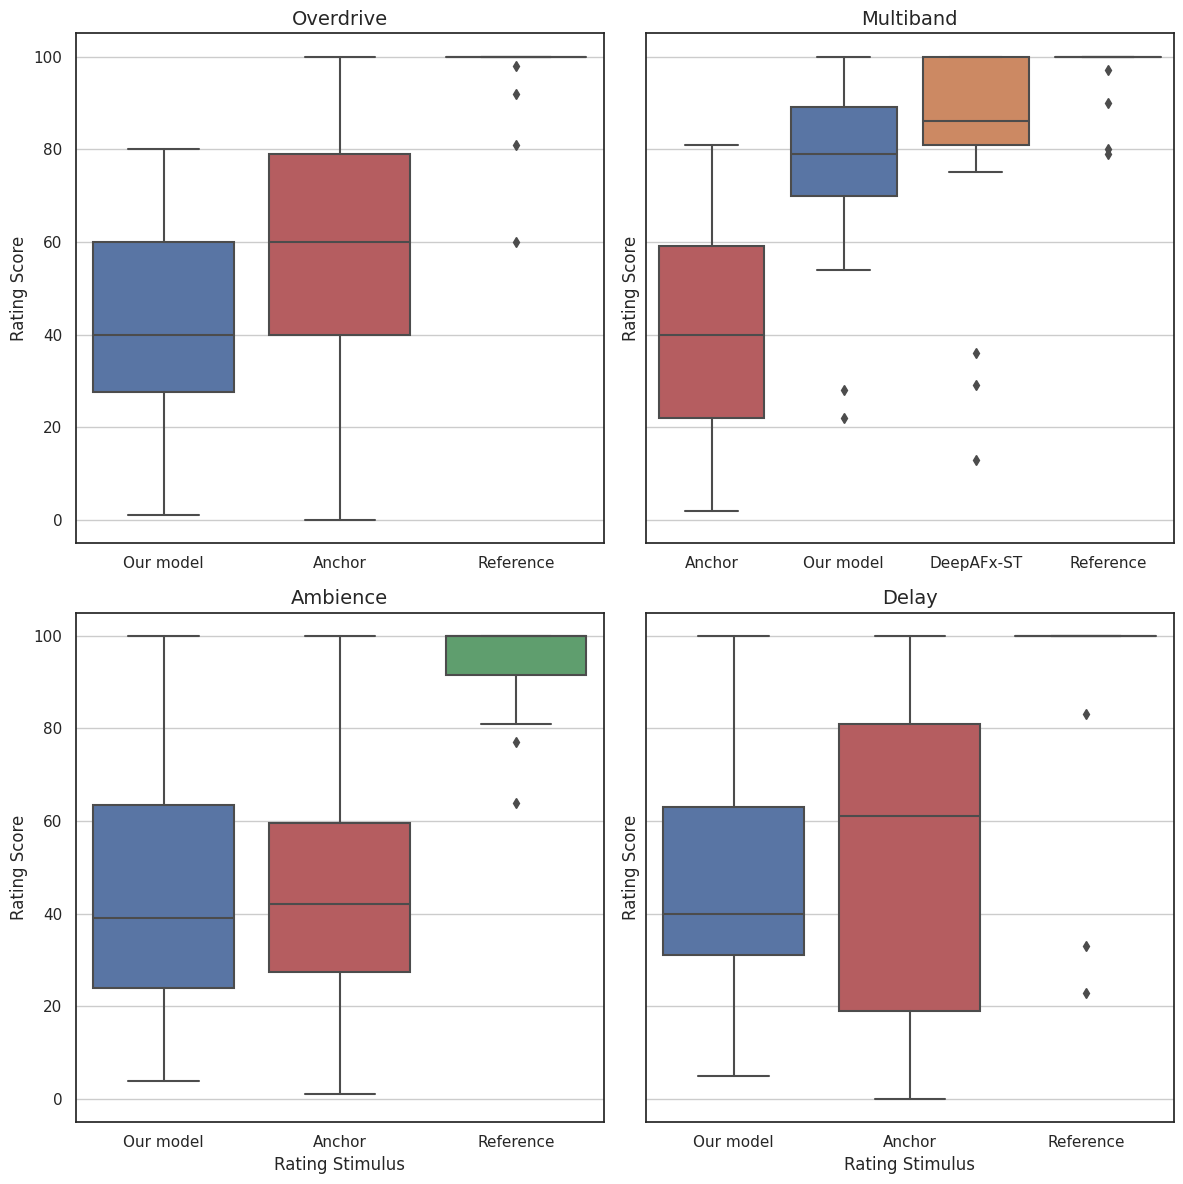

In [64]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharey=True)

effects = ['overdrive', 'multiband', 'ambience', 'delay']

for i, effect_name in enumerate(effects):
    row_idx, col_idx = divmod(i, 2)
    current_ax = ax[row_idx, col_idx]
    
    fx = df[df['trial_id'].str.contains(effect_name.lower())]
    order = fx.groupby(by=["rating_stimulus"])['rating_score'].median().sort_values().index
    
    my_colours = [colour_map[fx] for fx in order]
    sns.set_palette(my_colours)
    
    sns.boxplot(fx, x='rating_stimulus', y='rating_score', order=order, ax=current_ax)
    
    if col_idx == 0:
        current_ax.set_ylabel("Rating Score")
    else:
        current_ax.set_ylabel("Rating Score")
        
    if row_idx == 1:
        current_ax.set_xlabel("Rating Stimulus")
    else:
        current_ax.set_xlabel("")
    
    current_ax.set_ylim([-5,105])
    current_ax.yaxis.grid(True)
    
    labels = [format_map[x] for x in order]
    current_ax.set_xticklabels(labels, 
#                        rotation=20, 
#                        fontsize=12
                      )
    
    current_ax.set_title(effect_name.title(), fontsize=14)

plt.tight_layout()
plt.savefig("/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/mushra/mushra.png")

In [31]:
# boxplot_effect(df, 'overdrive')

In [32]:
# boxplot_effect(df, 'multiband')

In [33]:
# boxplot_effect(df, 'delay')

In [34]:
# boxplot_effect(df, 'ambience')